In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgbm

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import re

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Load data

In [3]:
# Separate features and target variable
tr_data = pd.read_csv('transformed_training_data.csv')
val_data = pd.read_csv('transformed_validation_data.csv')
te_data = pd.read_csv('transformed_test_data.csv')

X_train, y_train = tr_data.drop('target_sales', axis=1), tr_data['target_sales']
X_val, y_val = val_data.drop('target_sales', axis=1), val_data['target_sales']
X_test, y_test = te_data.drop('target_sales', axis=1), te_data['target_sales']

X_train_renamed = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_val_renamed = X_val.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test_renamed = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Models initial analysis

In [3]:
# Create a linear regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = linear_model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse_val}')
print(f'R-squared on Validation Set: {r2_val}')

# Make predictions on the test set
y_test_pred = linear_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'Mean Squared Error on Test Set: {mse_test}')
print(f'R-squared on Test Set: {r2_test}')

Mean Squared Error on Validation Set: 5.489472762870544
R-squared on Validation Set: 0.607811177895472
Mean Squared Error on Test Set: 5.551394575486848
R-squared on Test Set: 0.6126804878277402


### Random Forest Regression Model
Because of the RandomForest's complexity, the grid search is really small. We can assume that there exists better set of parameters for this model.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [300, 600, 900]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Choose an appropriate scoring metric
                           cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

In [14]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


# Make predictions on the validation set
y_val_pred = best_rf_model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f'MSE on Validation Set: {mse_val}')
print(f'R-squared on Validation Set: {r2_val}')

# Make predictions on the test set
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'MSE on Test Set: {mse_test}')
print(f'R-squared on Test Set: {r2_test}')

Best Hyperparameters: {'n_estimators': 600}
MSE on Validation Set: 4.287646275736839
R-squared on Validation Set: 0.6936742351914365
MSE on Test Set: 4.278766429782701
R-squared on Test Set: 0.701471458433102


## Light Gradient Boosting Regressor Model
The model is lightweight, so I expanded grid search to find the best results possible.

In [ ]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.2],
    'n_estimators': [500, 700, 900],
    'max_depth': [-1, 8],
    'num_leaves': [120, 150, 170],
    'reg_alpha': [30, 50, 70]
}

# Create the LightGBM model
lgbm_model = lgbm.LGBMRegressor(random_state=412)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Choose an appropriate scoring metric
                           cv=5)

# Fit the model to the training data
grid_search.fit(X_train_renamed, y_train)

# Get the best model
best_lgbm_model = grid_search.best_estimator_

In [12]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the validation set
y_val_pred = best_lgbm_model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
print(f'MSE on Validation Set: {mse_val}')
print(f'R-squared on Validation Set: {r2_val}')

# Make predictions on the test set
y_test_pred = best_lgbm_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print(f'MSE on Test Set: {mse_test}')
print(f'R-squared on Test Set: {r2_test}')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 900, 'num_leaves': 120, 'reg_alpha': 30}
MSE on Validation Set: 1.3036310782126432
R-squared on Validation Set: 0.9032640966192068
MSE on Validation Set: 3.8078805856763625
R-squared on Validation Set: 0.7279505216398627
MSE on Test Set: 3.7369929022008397
R-squared on Test Set: 0.7392708718160803


## Feature importance analysis

Random Forest Regressor Model

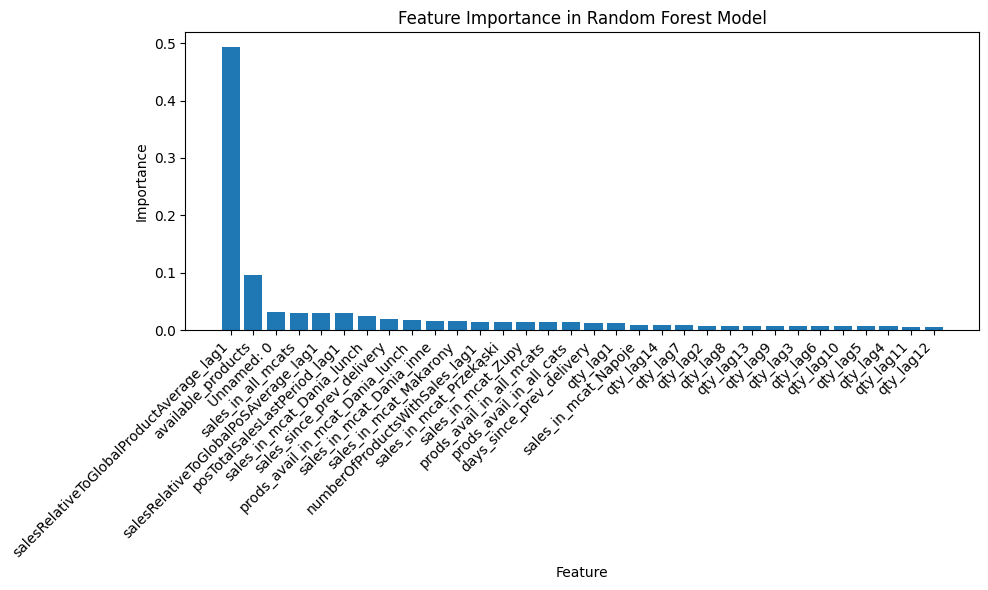

In [6]:
import matplotlib.pyplot as plt

feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns  # Assuming your features are in a DataFrame

# Sort features by importance in descending order
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model")
plt.tight_layout()
plt.show()



Gradient Boosting Model Model

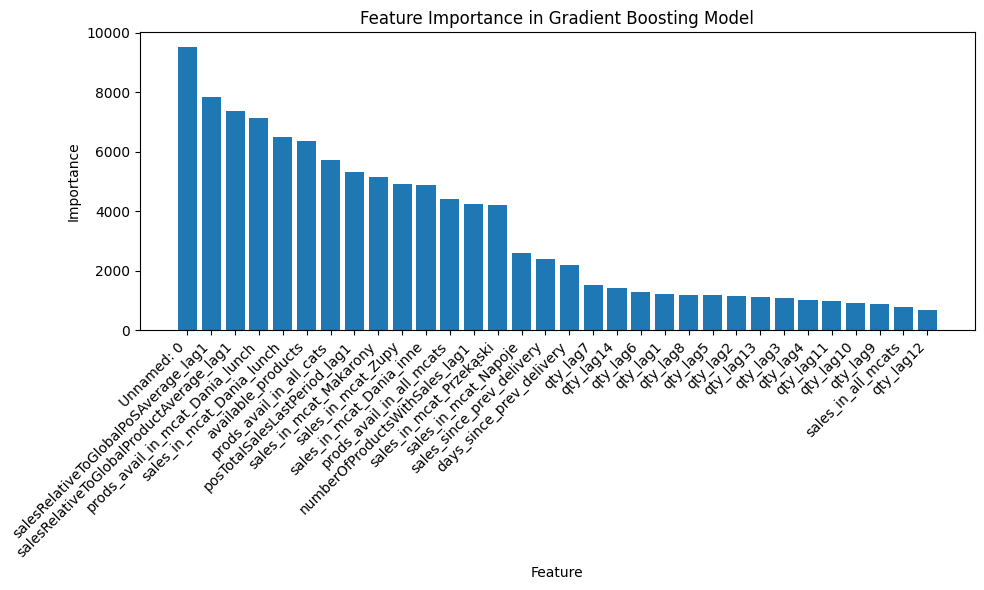

In [7]:
feature_importances = best_lgbm_model.feature_importances_
feature_names = X_train.columns  # Assuming your features are in a DataFrame

# Sort features by importance in descending order
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Gradient Boosting Model")
plt.tight_layout()
plt.show()

Gradient Boosting Machine's feature importance distribution is more smooth, meaning that it takes more variables into cosideration while making prediction. It is a good quality of the model. In this situation we have more to say about interpretability of the model.

## Learning curves & Validation curves

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve

models = [linear_model, best_rf_model, best_lgbm_model]
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'LGBM']

# Learning Curves
plt.figure(figsize=(18, 5))
for i, model in enumerate(models):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train_renamed, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    plt.subplot(1, 4, i + 1)
    plt.plot(train_sizes, train_mse_mean, label='Training MSE')
    plt.plot(train_sizes, test_mse_mean, label='Validation MSE')
    plt.title(f'Learning Curve - {model_names[i]}')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.legend()

plt.tight_layout()
plt.savefig('learning_curves.png')

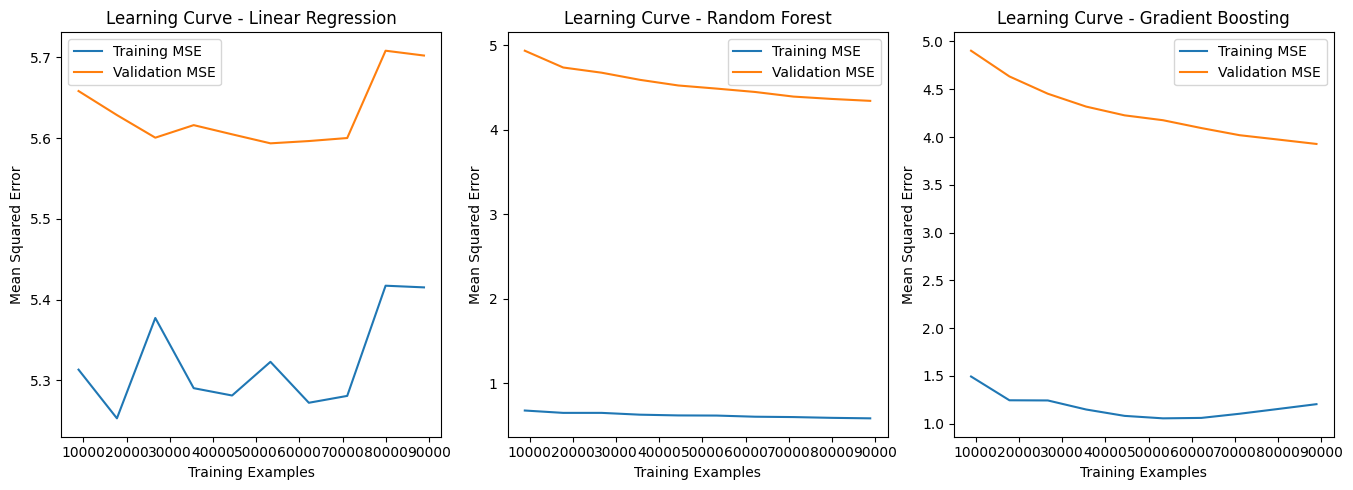

In [15]:
from IPython.display import Image
Image(filename='learning_curves.png') 


# Summation - models choosing

Gradient boosting achieves the best scores among the 3 tested models: 3.73 against 4.27 and 5.55 for Random Forest and Linear Regression respectively. Looking at the learning curves I can say that the models are not overfitted. To be more sure, I should perform few epochs training and see how the curves are behaving then, but for out case its not neccesary as the score is satisfying.

# Save the best model

In [8]:
import pickle

pickle.dump(best_rf_model, open('best_lgbm_model.pkl', 'wb'))